In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

In [2]:
# Load the dataset
data = pd.read_csv('KDD.csv')

data.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,181,5450,0,0,0,0,0,1,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,0
1,0,239,486,0,0,0,0,0,1,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0
2,0,235,1337,0,0,0,0,0,1,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,0
3,0,219,1337,0,0,0,0,0,1,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,0
4,0,217,2032,0,0,0,0,0,1,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,0


In [3]:
data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
count,494021.000000,4.940210e+05,4.940210e+05,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,...,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000
mean,47.979302,3.025610e+03,8.685324e+02,0.000045,0.006433,0.000014,0.034519,0.000152,0.148247,0.010212,...,188.665670,0.753780,0.030906,0.601935,0.006684,0.176754,0.176443,0.058118,0.057412,0.803089
std,707.746472,9.882181e+05,3.304000e+04,0.006673,0.134805,0.005510,0.782103,0.015520,0.355345,1.798326,...,106.040437,0.410781,0.109259,0.481309,0.042133,0.380593,0.380919,0.230590,0.230140,0.397665
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,46.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,58329.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,884.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 39 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494021 non-null  int64  
 1   src_bytes                    494021 non-null  int64  
 2   dst_bytes                    494021 non-null  int64  
 3   land                         494021 non-null  int64  
 4   wrong_fragment               494021 non-null  int64  
 5   urgent                       494021 non-null  int64  
 6   hot                          494021 non-null  int64  
 7   num_failed_logins            494021 non-null  int64  
 8   logged_in                    494021 non-null  int64  
 9   num_compromised              494021 non-null  int64  
 10  root_shell                   494021 non-null  int64  
 11  su_attempted                 494021 non-null  int64  
 12  num_root                     494021 non-null  int64  
 13 

In [5]:
# Extract input features (X) and target variable (Y)
X = data.iloc[:, :-1]  # Select all columns except the last one
Y = data.iloc[:, -1]   # Select the last column

# Verify the shapes of X and Y
print("X shape:", X.shape)
print("Y shape:", Y.shape)

X shape: (494021, 38)
Y shape: (494021,)


In [6]:
# Normalize the input features (X)
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Perform feature selection
feature_selector = SelectKBest(score_func=f_classif, k=9)  # Select top 9 features
X_selected = feature_selector.fit_transform(X_normalized, Y)

# Concatenate the selected features and target variable
selected_feature_names = feature_selector.get_support(indices=True)
selected_feature_names = list(data.columns[selected_feature_names])

my_data = pd.DataFrame(X_selected, columns=selected_feature_names)
my_data['target'] = Y

# Show the first five rows of the updated dataset
my_data.head()

C:\Users\FiX-DEll\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [16 17] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\FiX-DEll\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


,logged_in,count,srv_count,serror_rate,same_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_same_src_port_rate,dst_host_srv_serror_rate,target
0,1.0,0.015656,0.015656,0.0,1.0,0.0,0.035294,0.11,0.0,0
1,1.0,0.015656,0.015656,0.0,1.0,0.0,0.074510,0.05,0.0,0
2,1.0,0.015656,0.015656,0.0,1.0,0.0,0.113725,0.03,0.0,0
3,1.0,0.011742,0.011742,0.0,1.0,0.0,0.152941,0.03,0.0,0
4,1.0,0.011742,0.011742,0.0,1.0,0.0,0.192157,0.02,0.0,0


In [7]:
# Splitting my_data 1 (70% train, 30% test)
x_train1, x_test1, y_train1, y_test1 = train_test_split(my_data.iloc[:, :-1], my_data['target'], test_size=0.3, random_state=1)

# Splitting my_data 2 (60% train, 40% test)
x_train2, x_test2, y_train2, y_test2 = train_test_split(my_data.iloc[:, :-1], my_data['target'], test_size=0.4, random_state=1)

# Splitting my_data 3 (50% train, 50% test)
x_train3, x_test3, y_train3, y_test3 = train_test_split(my_data.iloc[:, :-1], my_data['target'], test_size=0.5, random_state=1)

In [8]:
# Train Decision Tree classifier on my_data 1
dt1 = DecisionTreeClassifier(random_state=42)
dt1.fit(x_train1, y_train1)

# Predict and evaluate performance on my_data 1
y_pred1 = dt1.predict(x_test1)
report1 = classification_report(y_test1, y_pred1)
print("Classification Report - my_data 1:")
print(report1)
print("============================================================")

# Train Decision Tree classifier on my_data 2
dt2 = DecisionTreeClassifier(random_state=42)
dt2.fit(x_train2, y_train2)

# Predict and evaluate performance on my_data 2
y_pred2 = dt2.predict(x_test2)
report2 = classification_report(y_test2, y_pred2)
print("Classification Report - my_data 2:")
print(report2)
print("============================================================")

# Train Decision Tree classifier on my_data 3
dt3 = DecisionTreeClassifier(random_state=42)
dt3.fit(x_train3, y_train3)

# Predict and evaluate performance on my_data 3
y_pred3 = dt3.predict(x_test3)
report3 = classification_report(y_test3, y_pred3)
print("Classification Report - my_data 3:")
print(report3)
print("============================================================")

Classification Report - my_data 1:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     29106
           1       1.00      0.99      0.99    119101

    accuracy                           0.99    148207
   macro avg       0.98      0.99      0.99    148207
weighted avg       0.99      0.99      0.99    148207

Classification Report - my_data 2:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     38882
           1       1.00      0.99      0.99    158727

    accuracy                           0.99    197609
   macro avg       0.98      0.99      0.99    197609
weighted avg       0.99      0.99      0.99    197609

Classification Report - my_data 3:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     48574
           1       1.00      0.99      0.99    198437

    accuracy                           0.99    247011
   macro avg       0.98

In [9]:
# Function to visualize Decision Tree
def visualize_tree(dt, max_depth,title="Decision Tree"):
    plt.figure(figsize=(10, 6))
    plot_tree(dt, max_depth=max_depth, feature_names=my_data.columns[:-1], class_names=['normal', 'attack'], filled=True, rounded=True)
    plt.title(title)
    plt.show()

In [10]:
# Function to visualize confusion matrix
def plot_confusion_matrix(confusion_matrix, title="confusion_matrix"):
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix, annot=True, cmap="Greens", fmt="d", cbar=False)
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

In [11]:
# Function to evaluate performance and metrics
def evaluate_performance(dt, x_test, y_test):
    y_pred = dt.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    matrix = confusion_matrix(y_test, y_pred)
    return accuracy, report, matrix

In [12]:
# Function to print performance and display metrics
def print_performance(accuracy, report, matrix):
    print("Accuracy:", accuracy)
    print("Classification Report:")
    print(report)
    print("Confusion Matrix:")
    print(matrix)

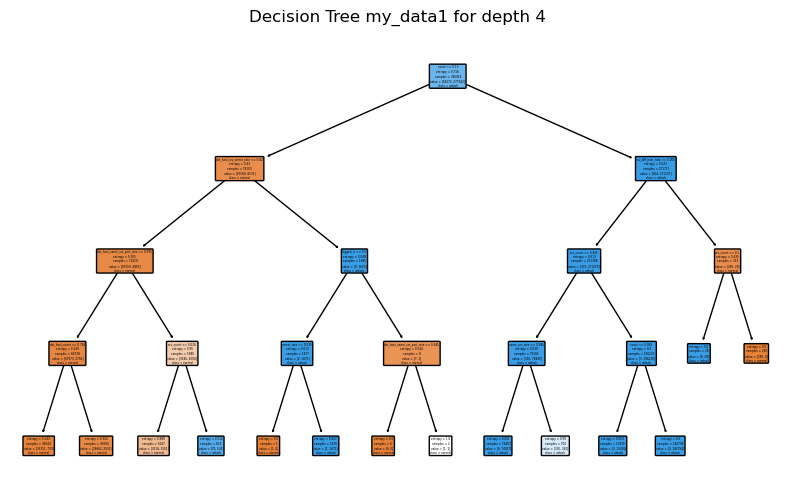

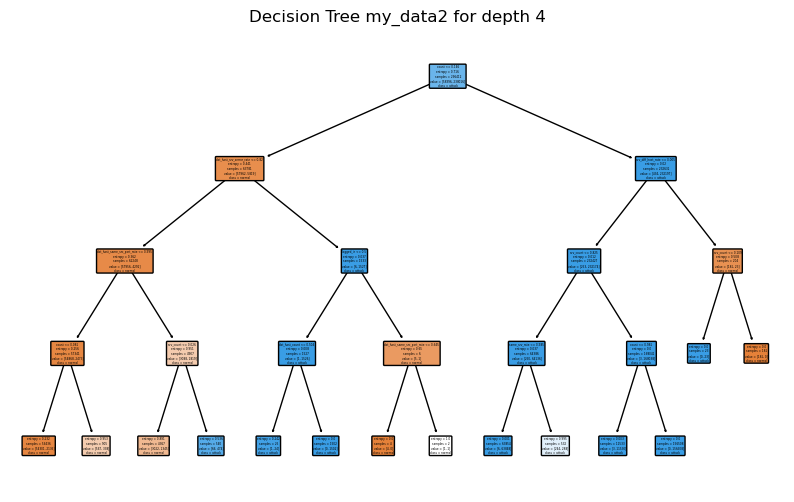

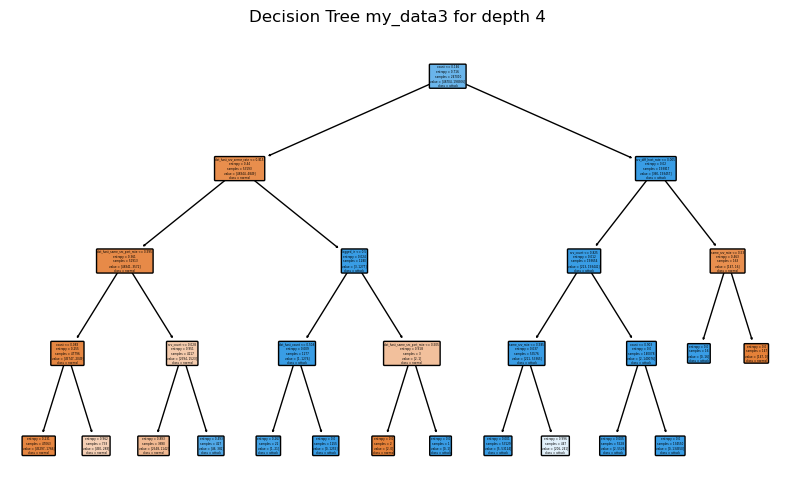

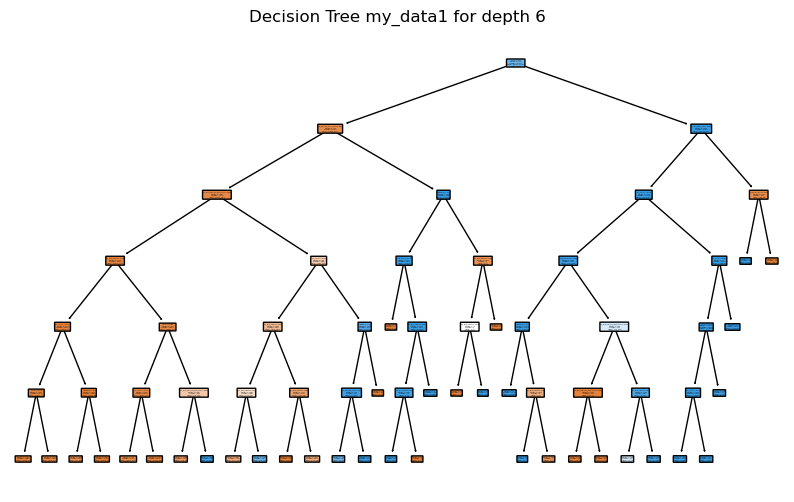

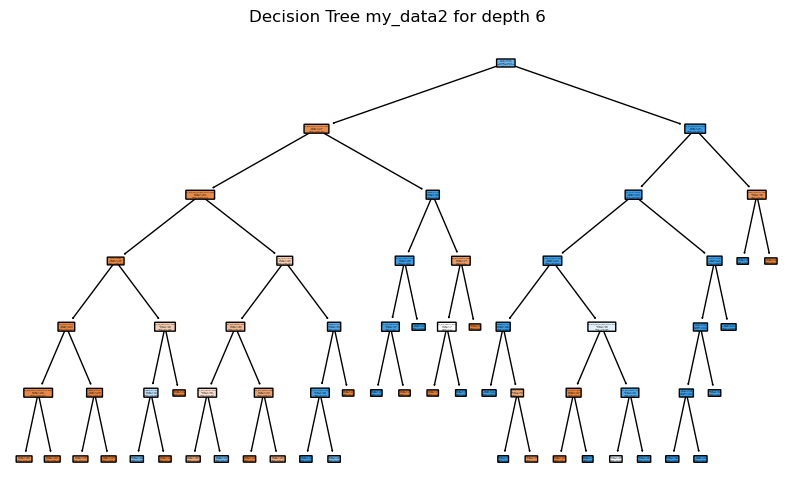

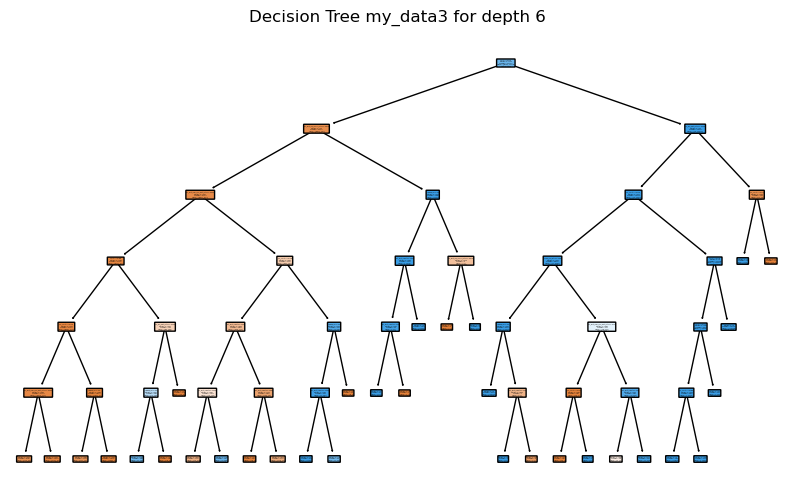

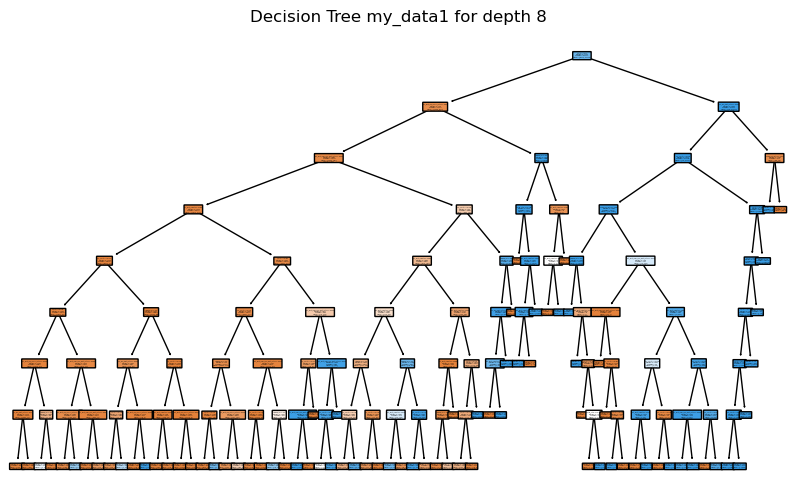

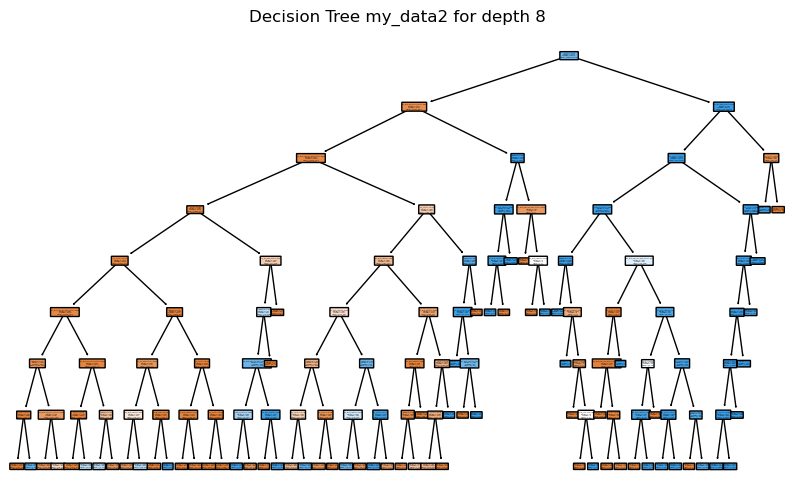

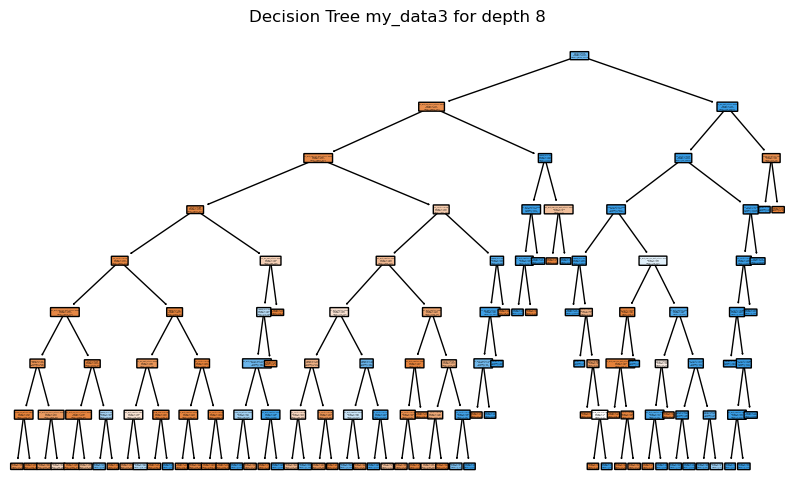

In [13]:
# Decision Tree parameters
max_depths = [4, 6, 8]

for d in max_depths:
    dt1 = DecisionTreeClassifier(criterion='entropy', max_depth=d, random_state=42)
    dt1.fit(x_train1, y_train1)
    title1=f"Decision Tree my_data1 for depth {d}"
    visualize_tree(dt1, d,title1)

    dt2 = DecisionTreeClassifier(criterion='entropy', max_depth=d, random_state=42)
    dt2.fit(x_train2, y_train2)
    title2=f"Decision Tree my_data2 for depth {d}"    
    visualize_tree(dt2, d,title2)

    dt3 = DecisionTreeClassifier(criterion='entropy', max_depth=d, random_state=42)
    dt3.fit(x_train3, y_train3)
    title3=f"Decision Tree my_data3 for depth {d}"
    visualize_tree(dt3, d,title3)

my_data1 for depth 4 Performance
Accuracy: 0.9858441234219706
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     29106
           1       1.00      0.98      0.99    119101

    accuracy                           0.99    148207
   macro avg       0.97      0.99      0.98    148207
weighted avg       0.99      0.99      0.99    148207

Confusion Matrix:
[[ 28896    210]
 [  1888 117213]]


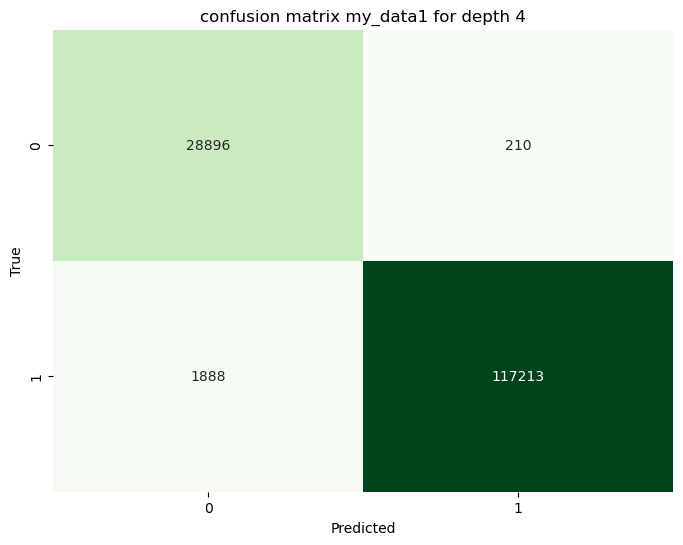

my_data2 for depth 4 Performance
Accuracy: 0.9858356653796133
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97     38882
           1       1.00      0.98      0.99    158727

    accuracy                           0.99    197609
   macro avg       0.97      0.99      0.98    197609
weighted avg       0.99      0.99      0.99    197609

Confusion Matrix:
[[ 38642    240]
 [  2559 156168]]


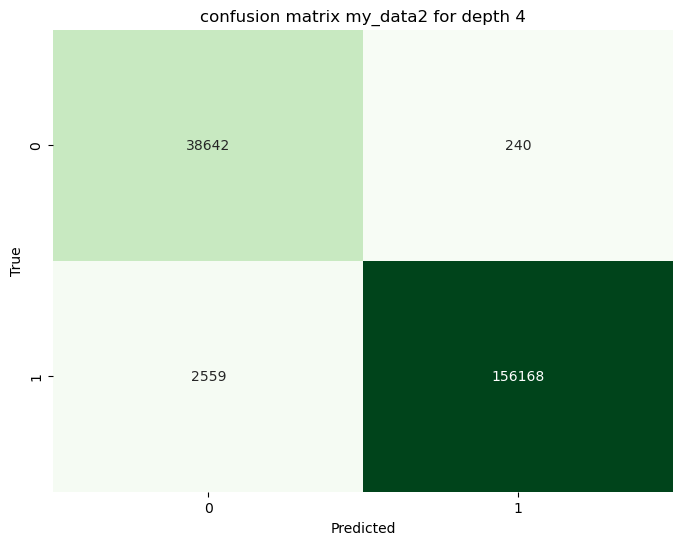

my_data3 for depth 4 Performance
Accuracy: 0.9858386873459076
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97     48574
           1       1.00      0.98      0.99    198437

    accuracy                           0.99    247011
   macro avg       0.97      0.99      0.98    247011
weighted avg       0.99      0.99      0.99    247011

Confusion Matrix:
[[ 48288    286]
 [  3212 195225]]


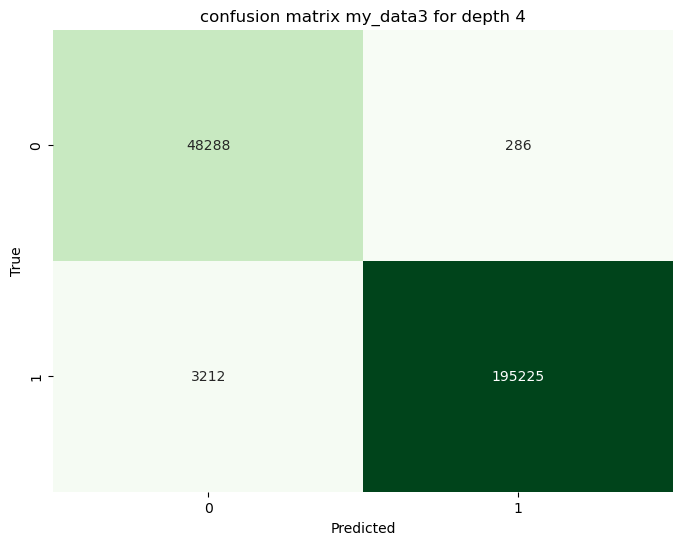

my_data1 for depth 6 Performance
Accuracy: 0.9887184815831911
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     29106
           1       1.00      0.99      0.99    119101

    accuracy                           0.99    148207
   macro avg       0.97      0.99      0.98    148207
weighted avg       0.99      0.99      0.99    148207

Confusion Matrix:
[[ 29006    100]
 [  1572 117529]]


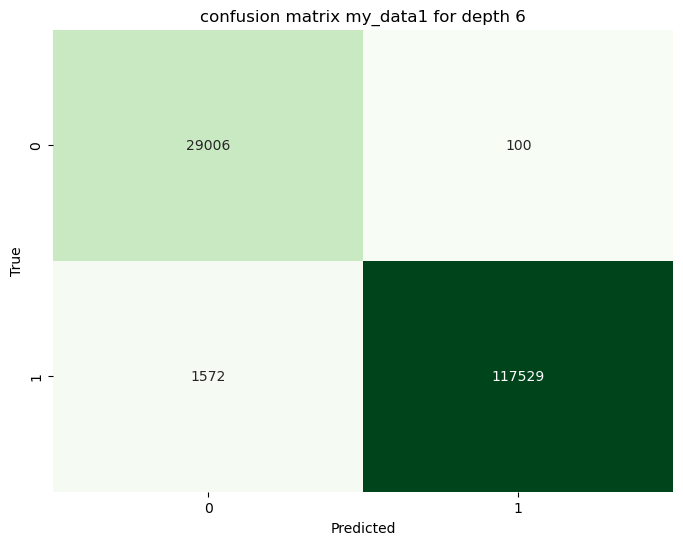

my_data2 for depth 6 Performance
Accuracy: 0.9887808753649885
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     38882
           1       1.00      0.99      0.99    158727

    accuracy                           0.99    197609
   macro avg       0.97      0.99      0.98    197609
weighted avg       0.99      0.99      0.99    197609

Confusion Matrix:
[[ 38702    180]
 [  2037 156690]]


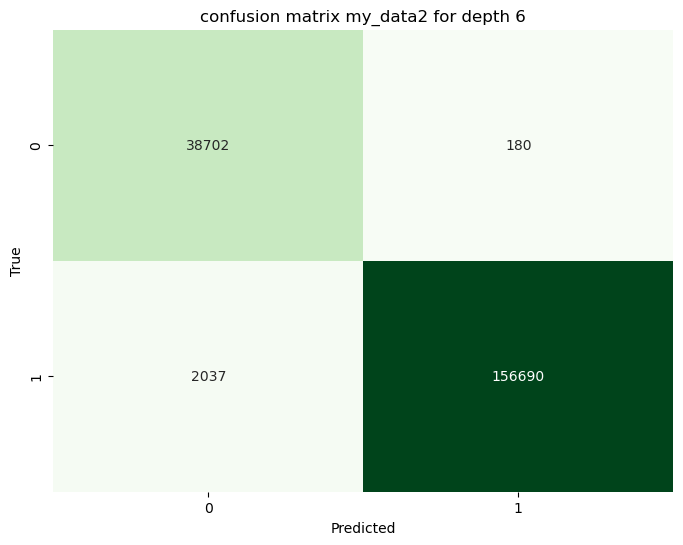

my_data3 for depth 6 Performance
Accuracy: 0.9887090048621316
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     48574
           1       1.00      0.99      0.99    198437

    accuracy                           0.99    247011
   macro avg       0.97      0.99      0.98    247011
weighted avg       0.99      0.99      0.99    247011

Confusion Matrix:
[[ 48363    211]
 [  2578 195859]]


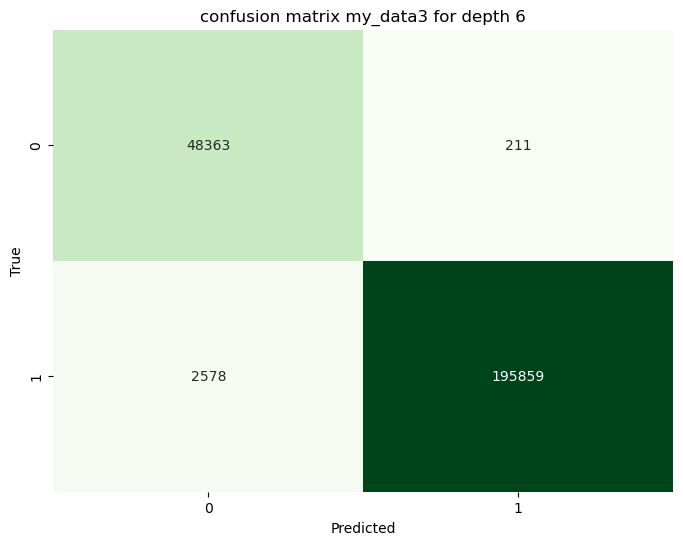

my_data1 for depth 8 Performance
Accuracy: 0.9900477035497649
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     29106
           1       1.00      0.99      0.99    119101

    accuracy                           0.99    148207
   macro avg       0.98      0.99      0.98    148207
weighted avg       0.99      0.99      0.99    148207

Confusion Matrix:
[[ 28971    135]
 [  1340 117761]]


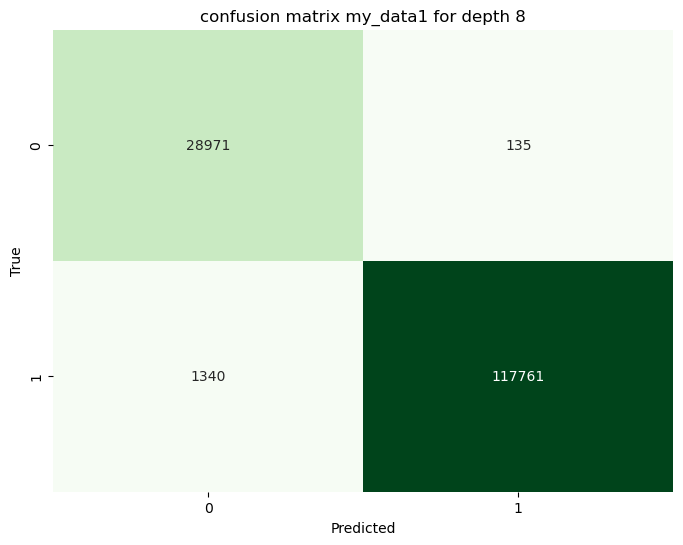

my_data2 for depth 8 Performance
Accuracy: 0.9900662419221796
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     38882
           1       1.00      0.99      0.99    158727

    accuracy                           0.99    197609
   macro avg       0.98      0.99      0.98    197609
weighted avg       0.99      0.99      0.99    197609

Confusion Matrix:
[[ 38694    188]
 [  1775 156952]]


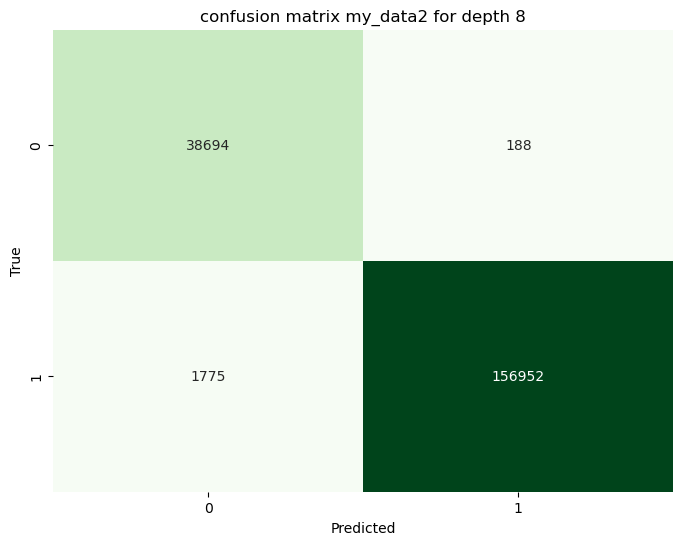

my_data3 for depth 8 Performance
Accuracy: 0.9900571229621353
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     48574
           1       1.00      0.99      0.99    198437

    accuracy                           0.99    247011
   macro avg       0.98      0.99      0.98    247011
weighted avg       0.99      0.99      0.99    247011

Confusion Matrix:
[[ 48364    210]
 [  2246 196191]]


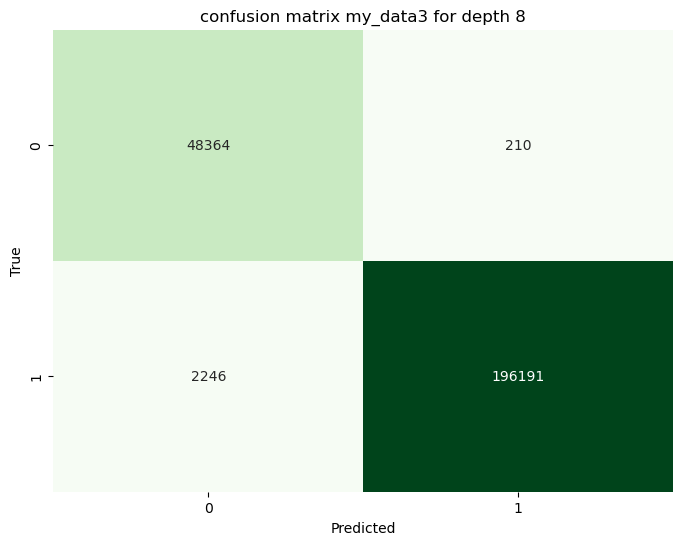

In [14]:
# Decision Tree parameters
max_depths = [4, 6, 8]

for d in max_depths:
    print(f"my_data1 for depth {d} Performance")
    dt1 = DecisionTreeClassifier(criterion='entropy', max_depth=d, random_state=42)
    dt1.fit(x_train1, y_train1)
    accuracy1, report1, matrix1 = evaluate_performance(dt1, x_test1, y_test1)
    print_performance(accuracy1, report1, matrix1)
    title1=f"confusion matrix my_data1 for depth {d}"
    plot_confusion_matrix(matrix1,title1)
    print("====================================================================================================")
    
    print(f"my_data2 for depth {d} Performance")
    dt2 = DecisionTreeClassifier(criterion='entropy', max_depth=d, random_state=42)
    dt2.fit(x_train2, y_train2)
    accuracy2, report2, matrix2 = evaluate_performance(dt2, x_test2, y_test2)
    print_performance(accuracy2, report2, matrix2)
    title2=f"confusion matrix my_data2 for depth {d}"
    plot_confusion_matrix(matrix2,title2)
    print("====================================================================================================")

    print(f"my_data3 for depth {d} Performance")
    dt3 = DecisionTreeClassifier(criterion='entropy', max_depth=d, random_state=42)
    dt3.fit(x_train3, y_train3)
    accuracy3, report3, matrix3 = evaluate_performance(dt3, x_test3, y_test3)
    print_performance(accuracy3, report3, matrix3)
    title3=f"confusion matrix my_data3 for depth {d}"
    plot_confusion_matrix(matrix3,title3)
    print("====================================================================================================")

In [15]:
# Train Decision Tree classifier on my_data 1
dt = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=10, random_state=42)
dt.fit(x_train1, y_train1)

# Predict on train and test data
y_train_pred = dt.predict(x_train1)
y_test_pred = dt.predict(x_test1)

# Compute F1 scores for train and test data
train_f1 = f1_score(y_train1, y_train_pred)
test_f1 = f1_score(y_test1, y_test_pred)

print("F1 Score (Train Data):", train_f1)
print("F1 Score (Test Data):", test_f1)

F1 Score (Train Data): 0.9946266216443516
F1 Score (Test Data): 0.9942403211252877


In [16]:
# Pre-pruning: Limit maximum depth
dt_pre_prune = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=10, random_state=42)
dt_pre_prune.fit(x_train1, y_train1)
y_train_pred_pre_prune = dt_pre_prune.predict(x_train1)
y_test_pred_pre_prune = dt_pre_prune.predict(x_test1)
train_f1_pre_prune = f1_score(y_train1, y_train_pred_pre_prune)
test_f1_pre_prune = f1_score(y_test1, y_test_pred_pre_prune)
print("Pre-pruning F1 Score (Train Data):", train_f1_pre_prune)
print("Pre-pruning F1 Score (Test Data):", test_f1_pre_prune)
print("")

# Post-pruning using cost complexity pruning
path = dt.cost_complexity_pruning_path(x_train1, y_train1)
ccp_alphas = path.ccp_alphas[:-1]
dt_post_prune = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_post_prune.ccp_alpha = ccp_alphas[np.argmax(test_f1)]  # Choose alpha with highest F1 score
dt_post_prune.fit(x_train1, y_train1)
y_train_pred_post_prune = dt_post_prune.predict(x_train1)
y_test_pred_post_prune = dt_post_prune.predict(x_test1)
train_f1_post_prune = f1_score(y_train1, y_train_pred_post_prune)
test_f1_post_prune = f1_score(y_test1, y_test_pred_post_prune)
print("Post-pruning F1 Score (Train Data):", train_f1_post_prune)
print("Post-pruning F1 Score (Test Data):", test_f1_post_prune)
print("")

# K-fold cross-validation
k = 5  # Number of folds
dt_cv = DecisionTreeClassifier(criterion='entropy', random_state=42)
cv_scores_train = cross_val_score(dt_cv, x_train1, y_train1, cv=k, scoring='f1')
cv_scores_test = cross_val_score(dt_cv, x_test1, y_test1, cv=k, scoring='f1')
print("Cross-Validation F1 Scores (Train Data):", cv_scores_train)
print("Cross-Validation F1 Scores (Test Data):", cv_scores_test)
print("Average Cross-Validation F1 Score (Train Data):", np.mean(cv_scores_train))
print("Average Cross-Validation F1 Score (Test Data):", np.mean(cv_scores_test))

Pre-pruning F1 Score (Train Data): 0.9946266216443516
Pre-pruning F1 Score (Test Data): 0.9942403211252877

Post-pruning F1 Score (Train Data): 0.9955374094553399
Post-pruning F1 Score (Test Data): 0.9942044989947441

Cross-Validation F1 Scores (Train Data): [0.9943226  0.99427869 0.99423386 0.9942068  0.99441361]
Cross-Validation F1 Scores (Test Data): [0.99346956 0.99372076 0.99382885 0.99420748 0.99291617]
Average Cross-Validation F1 Score (Train Data): 0.9942911128091456
Average Cross-Validation F1 Score (Test Data): 0.9936285652696839


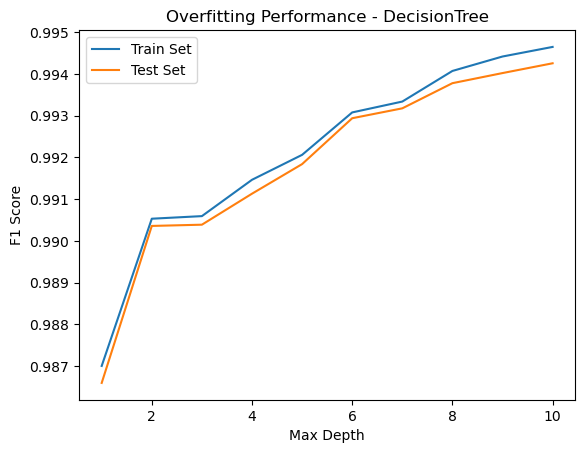

In [17]:
# Initialize lists to store F1 scores
train_f1_scores = []
test_f1_scores = []
depths = []

# Vary the maximum depth of the decision tree
for depth in range(1, 11):
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=42)
    clf.fit(x_train1, y_train1)
    train_f1 = f1_score(y_train1, clf.predict(x_train1))
    test_f1 = f1_score(y_test1, clf.predict(x_test1))

    depths.append(depth)
    train_f1_scores.append(train_f1)
    test_f1_scores.append(test_f1)

# Plot the F1 scores
plt.plot(depths, train_f1_scores, label='Train Set')
plt.plot(depths, test_f1_scores, label='Test Set')
plt.xlabel('Max Depth')
plt.ylabel('F1 Score')
plt.title('Overfitting Performance - DecisionTree')
plt.legend()
plt.show()